In [18]:
# from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler
from PIL import Image
import torch
from tqdm.auto import tqdm
import pickle
from point_e.util.plotting import plot_point_cloud
import time

In [19]:
t1 = time.time()

In [20]:
def load_model(modelfile):
	loaded_model = pickle.load(open(modelfile, 'rb'))
	return loaded_model

In [21]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [22]:
pipe = load_model('models\pipe.pkl')
sampler = load_model('models\sampler.pkl')

In [23]:
t2 = time.time()

In [24]:
prompt = "doge inspired beanbag"

In [25]:
pipe.to(device)
pipe.enable_attention_slicing()

In [26]:
image = pipe(prompt).images[0]
image.save("prompt"+".png")
pipe.to('cpu')
import gc
torch.cuda.empty_cache()
gc.collect()

  0%|          | 0/50 [00:00<?, ?it/s]

Pipelines loaded with `torch_dtype=torch.float16` cannot run with `cpu` device. It is not recommended to move them to `cpu` as running them will fail. Please make sure to use an accelerator to run the pipeline in inference, due to the lack of support for`float16` operations on this device in PyTorch. Please, remove the `torch_dtype=torch.float16` argument, or use another device for inference.
Pipelines loaded with `torch_dtype=torch.float16` cannot run with `cpu` device. It is not recommended to move them to `cpu` as running them will fail. Please make sure to use an accelerator to run the pipeline in inference, due to the lack of support for`float16` operations on this device in PyTorch. Please, remove the `torch_dtype=torch.float16` argument, or use another device for inference.
Pipelines loaded with `torch_dtype=torch.float16` cannot run with `cpu` device. It is not recommended to move them to `cpu` as running them will fail. Please make sure to use an accelerator to run the pipelin

114

In [27]:
t3 = time.time()

In [28]:
imgpath = 'prompt.png'
img = Image.open(imgpath)
samples = None
for x in tqdm(sampler.sample_batch_progressive(batch_size=1, model_kwargs=dict(images=[img]))):
    samples = x

0it [00:00, ?it/s]

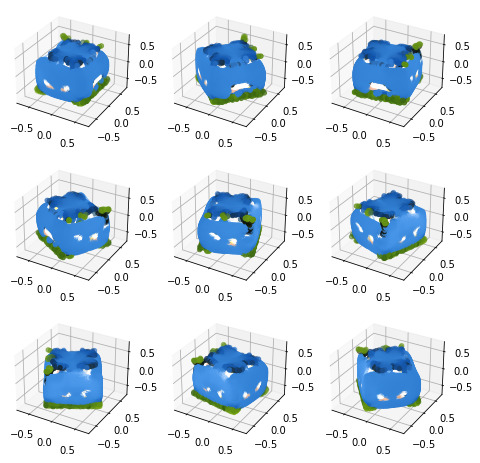

In [29]:
pc = sampler.output_to_point_clouds(samples)[0]
fig = plot_point_cloud(pc, grid_size=3)

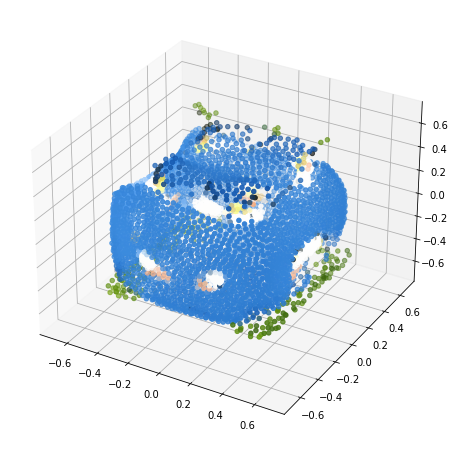

In [30]:
fig_full = plot_point_cloud(pc)

In [31]:
t4 = time.time()

In [32]:
times = {'Part1' : t2-t1, 
         'Part2' : t3-t2,
         'Part3' : t4-t3,
         'Total' : t4-t1}

In [33]:
times

{'Part1': 12.03866982460022,
 'Part2': 19.66331648826599,
 'Part3': 136.23326706886292,
 'Total': 167.93525338172913}

In [34]:
import gc
torch.cuda.empty_cache()
gc.collect()

31643

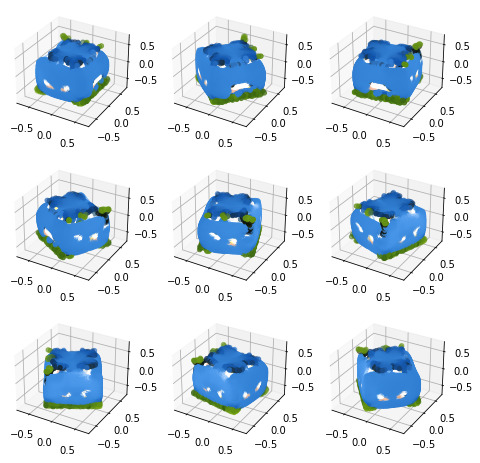

In [35]:
fig

In [36]:
type(fig)

matplotlib.figure.Figure